In [1]:
import pandas as pd
import numpy as np

import mysql.connector
from sqlalchemy import create_engine
import pandas.io.sql as psql
import sqlalchemy

from dateutil import parser
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
database_username = 'root'
database_password = 'yash'
database_ip       = '127.0.0.1'
database_name     = 'mainschema'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [3]:
df = pd.read_sql('SELECT * FROM brokerperformance2018', con=database_connection)
del df['index']
df

,Name,Hit Ratio,Avg. Growth,Total Recos
0,Choice Equity Broking,54,122,11
1,IIFL,50,70,28
2,Rudra Shares & Stocks Brokers,0,0,2
3,Indiabulls Ventures,42,213,49
4,Ventura,11,9,9
5,Motilal Oswal,36,63,526
6,ICICIdirect.com,46,31,309
7,Centrum,39,20,51
8,JM Financial,36,30,95
9,Geojit Financial Services,50,29,64


<function matplotlib.pyplot.show(*args, **kw)>

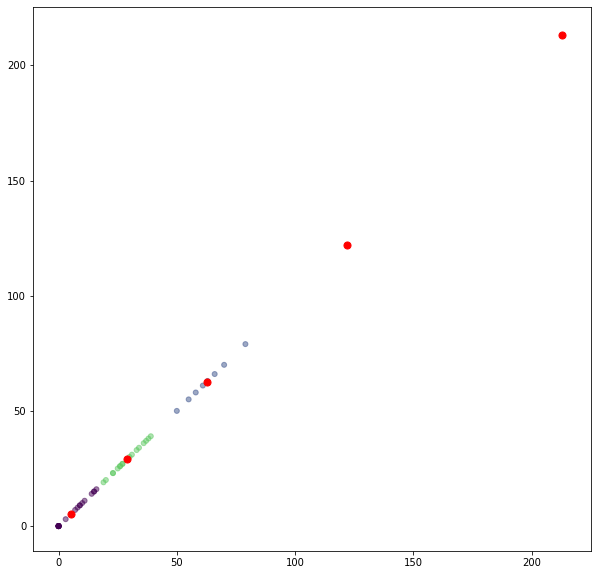

In [4]:
X1 = df[['Avg. Growth','Avg. Growth']]
model1 = KMeans(n_clusters=5).fit(X1)
centroids1 = model1.cluster_centers_
sortedcentroids1 = centroids1[:,0].copy()
sortedcentroids1.sort(axis=0)
labeldict1 = {}
for i in centroids1[:,0] :
    x = list(sortedcentroids1).index(i)
    y = list(centroids1[:,0]).index(i)
    labeldict1[y] = x
    unsortedlabels1 = model1.predict(X1)
sortedlabels1 = []
for element in unsortedlabels1 :
    sortedlabels1.append(labeldict1[element])

plt.figure(figsize=(10,10))
plt.scatter(df['Avg. Growth'], df['Avg. Growth'], c= unsortedlabels1, s=25, alpha=0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

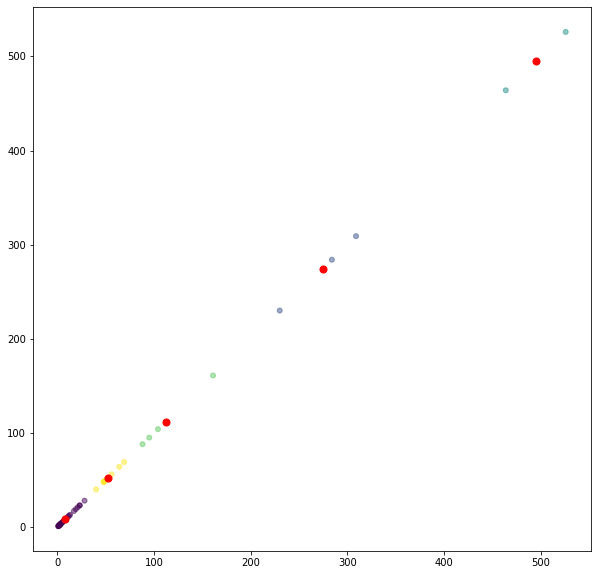

In [5]:
X2 = df[['Total Recos','Total Recos']]
model2 = KMeans(n_clusters=5).fit(X2)
centroids2 = model2.cluster_centers_
sortedcentroids2 = centroids2[:,0].copy()
sortedcentroids2.sort(axis=0)
labeldict2 = {}
for i in centroids2[:,0] :
    x = list(sortedcentroids2).index(i)
    y = list(centroids2[:,0]).index(i)
    labeldict2[y] = x
    unsortedlabels2 = model2.predict(X2)
sortedlabels2 = []
for element in unsortedlabels2 :
    sortedlabels2.append(labeldict2[element])

plt.figure(figsize=(10,10))
plt.scatter(df['Total Recos'], df['Total Recos'], c= unsortedlabels2, s=25, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

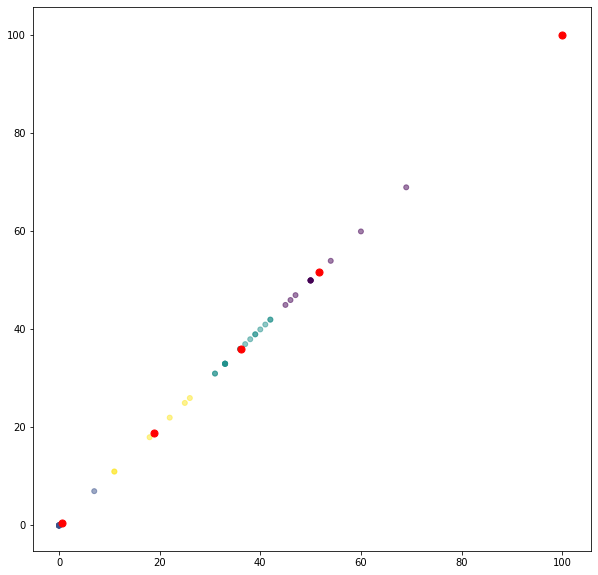

In [6]:
X3 = df[['Hit Ratio','Hit Ratio']]
model3 = KMeans(n_clusters=5).fit(X3)
centroids3 = model3.cluster_centers_
sortedcentroids3 = centroids3[:,0].copy()
sortedcentroids3.sort(axis=0)
labeldict3 = {}
for i in centroids3[:,0] :
    x = list(sortedcentroids3).index(i)
    y = list(centroids3[:,0]).index(i)
    labeldict3[y] = x
    unsortedlabels3 = model3.predict(X3)
sortedlabels3 = []
for element in unsortedlabels3 :
    sortedlabels3.append(labeldict3[element])

plt.figure(figsize=(10,10))
plt.scatter(df['Hit Ratio'], df['Hit Ratio'], c= unsortedlabels3, s=25, alpha=0.5)
plt.scatter(centroids3[:, 0], centroids3[:, 1], c='red', s=50)
plt.show

In [7]:
dfanalysis = pd.DataFrame({'broker': df['Name'], 'Hit Ratio': sortedlabels3,'Avg. Growth' : sortedlabels1, 'Total Recos' : sortedlabels2})
dfanalysis

,broker,Hit Ratio,Avg. Growth,Total Recos
0,Choice Equity Broking,3,3,0
1,IIFL,3,2,0
2,Rudra Shares & Stocks Brokers,0,0,0
3,Indiabulls Ventures,2,4,1
4,Ventura,1,0,0
5,Motilal Oswal,2,2,4
6,ICICIdirect.com,3,1,3
7,Centrum,2,1,1
8,JM Financial,2,1,2
9,Geojit Financial Services,3,1,1


In [8]:
dictstar1 = {0:1,   1:0.8, 2:0.6, 3:0.4, 4:0 }
dictstar2 = {0:0.8, 1:1,   2:0.8, 3:0.6, 4:0.4 }
dictstar3 = {0:0.6, 1:0.8, 2:1,   3:0.8, 4:0.6 }
dictstar4 = {0:0.4, 1:0.6, 2:0.8, 3:1,   4:0.6 }
dictstar5 = {0:0.2, 1:0.4, 2:0.6, 3:0.8, 4:1 }

In [9]:
star = []
for index, row in dfanalysis.iterrows():
    hr = row['Hit Ratio']
    ag = row['Avg. Growth']
    tr = row['Total Recos']
    probabilities = []
    probabilities.append(dictstar1[hr]*dictstar1[ag]*dictstar1[tr]) 
    probabilities.append(dictstar2[hr]*dictstar2[ag]*dictstar2[tr]) 
    probabilities.append(dictstar3[hr]*dictstar3[ag]*dictstar3[tr]) 
    probabilities.append(dictstar4[hr]*dictstar4[ag]*dictstar4[tr]) 
    probabilities.append(dictstar5[hr]*dictstar5[ag]*dictstar5[tr]) 
    rating = probabilities.index(max(probabilities))+1
    star.append(rating)

In [10]:
dfanalysis['Rating'] = star
dfanalysis

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,Choice Equity Broking,3,3,0,4
1,IIFL,3,2,0,3
2,Rudra Shares & Stocks Brokers,0,0,0,1
3,Indiabulls Ventures,2,4,1,3
4,Ventura,1,0,0,1
5,Motilal Oswal,2,2,4,3
6,ICICIdirect.com,3,1,3,4
7,Centrum,2,1,1,2
8,JM Financial,2,1,2,3
9,Geojit Financial Services,3,1,1,2


In [11]:
dfanalysis.to_sql(con=database_connection, name='finalrating2018', if_exists='replace')

In [12]:
df2016 = pd.read_sql('SELECT * FROM finalrating2016', con=database_connection)
del df2016['index']
df2016

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,KRChoksey,2,2,2,3
1,AUM Capital,3,3,0,4
2,Religare,3,1,3,4
3,Enochventures.com,1,1,0,2
4,Edelweiss,2,1,3,3
5,Motilal Oswal,2,1,3,3
6,Kotak Securities,3,2,1,3
7,Angel Broking,1,1,1,2
8,Geojit Financial Services,3,2,2,3
9,Centrum,2,2,2,3


In [13]:
df2017 = pd.read_sql('SELECT * FROM finalrating2017', con=database_connection)
del df2017['index']
df2017

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,Indiabulls Ventures,1,2,0,2
1,Indiabulls Ventures,1,2,0,2
2,Motilal Oswal,2,3,4,3
3,Ventura,1,1,0,2
4,ICICIdirect.com,3,4,4,5
...,...,...,...,...,...
56,India Nivesh,1,0,0,1
57,Sushil Finance,4,2,0,3
58,Wallfort Financial,0,0,0,1
59,GEPL Capital,2,1,0,2


In [14]:
df201617 = pd.concat([df2016, df2017], ignore_index=True)
df201617

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,KRChoksey,2,2,2,3
1,AUM Capital,3,3,0,4
2,Religare,3,1,3,4
3,Enochventures.com,1,1,0,2
4,Edelweiss,2,1,3,3
...,...,...,...,...,...
115,India Nivesh,1,0,0,1
116,Sushil Finance,4,2,0,3
117,Wallfort Financial,0,0,0,1
118,GEPL Capital,2,1,0,2


In [15]:
Xtrain = df201617[['Hit Ratio','Avg. Growth','Total Recos']].values
Ytrain = df201617['Rating'].values
Xtest = dfanalysis[['Hit Ratio','Avg. Growth','Total Recos']].values

In [16]:
clf = GaussianNB()
clf.fit(Xtrain, Ytrain)
GaussianNB()
Ytest = clf.predict(Xtest)

In [17]:
score = clf.score(Xtest,dfanalysis['Rating'].values)
score

0.86

In [18]:
confusion_matrix(dfanalysis['Rating'],Ytest)

array([[19,  0,  0,  0],
       [ 0, 10,  5,  0],
       [ 0,  0, 14,  0],
       [ 0,  0,  2,  0]], dtype=int64)